link: https://towardsdatascience.com/a-step-by-step-guide-in-detecting-causal-relationships-using-bayesian-structure-learning-in-python-c20c6b31cee5

--> implement bayesian network to learn causal relationships


https://erdogant.github.io/bnlearn/pages/html/Examples.html


[df2onehot] >Auto detecting dtypes.


100%|██████████| 25/25 [00:00<00:00, 1036.31it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 25/25 [00:00<00:00, 1615.38it/s]

[df2onehot] >Total onehot features: 24
[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


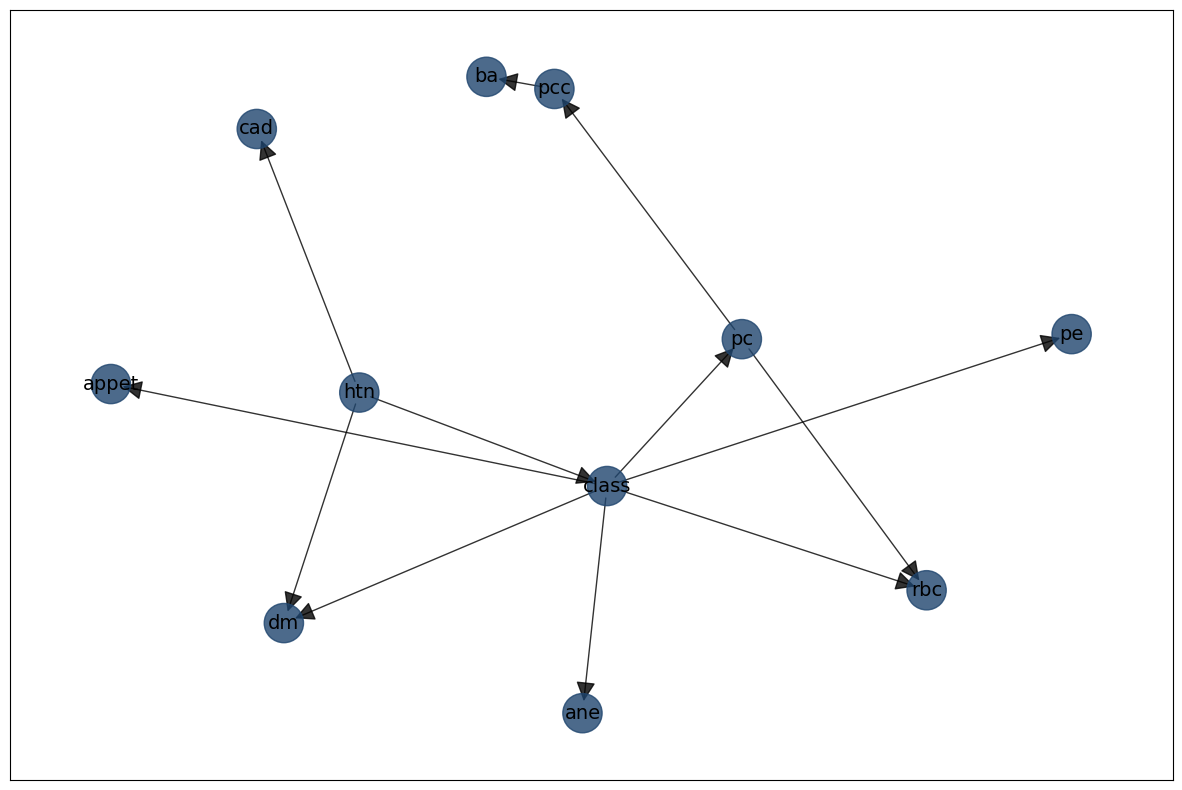

In [17]:
# !pip install bnlearn
import bnlearn as bn
import pandas as pd
# Load sprinkler dataset

# Print to screen for illustration
df = pd.read_csv('preprocessed/df.csv')
# Pre-processing of the input dataset
dfhot, dfnum = bn.df2onehot(df)

# Structure learning
DAG = bn.structure_learning.fit(dfnum)

# Plot
G = bn.plot(DAG)
    
    

# # Learn the DAG in data using Bayesian structure learning:
# # Structure learning
# model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# G = bn.plot(model)


In [29]:
# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of pc:
+-------+---------------------+---------------------+
| class | class(0)            | class(1)            |
+-------+---------------------+---------------------+
| pc(1) | 0.29688888888888887 | 0.27025641025641023 |
+-------+---------------------+---------------------+
| pc(2) | 0.32355555555555554 | 0.2564102564102564  |
+-------+---------------------+---------------------+
| pc(3) | 0.3795555555555555  | 0.4733333333333333  |
+-------+---------------------+---------------------+
[bnlearn] >CPD of rbc:
+--------+---------------------+-----+--------------------+
| class  | class(0)            | ... | class(1)           |
+--------+---------------------+-----+--------------------+
| pc     | pc(1)               | ... | pc(3)              |
+--------+---------------------+---

In [31]:
print(dfnum.head())


   rbc  pc  pcc  ba  htn  dm  cad  appet  pe  ane  class
0    1   3    1   1    2   2    1      1   1    1      0
1    1   3    1   1    1   1    1      1   1    1      0
2    3   3    1   1    1   2    1      2   1    2      0
3    3   2    2   1    2   1    1      2   2    2      0
4    3   3    1   1    1   1    1      1   1    1      0


In [35]:
# Print CPDs
CPDs = bn.print_CPD(model)
# Make inference
q = bn.inference.fit(model, variables=['class'], evidence={'appet': 1, 'htn': 1, 'rbc':3})

## to do: we should split the data into training and test set and then do the inference on the test set 
# --> then we can validate the model and compare it to the other models (random forests, etc.)

print(q.df)
print(q._str())

[bnlearn] >Data is stored in [query.df]
+----+------+---------+----------+
|    |   pc |   class |        p |
+====+======+=========+==========+
|  0 |    0 |       0 | 0.296889 |
+----+------+---------+----------+
|  1 |    0 |       1 | 0.270256 |
+----+------+---------+----------+
|  2 |    1 |       0 | 0.323556 |
+----+------+---------+----------+
|  3 |    1 |       1 | 0.25641  |
+----+------+---------+----------+
|  4 |    2 |       0 | 0.379556 |
+----+------+---------+----------+
|  5 |    2 |       1 | 0.473333 |
+----+------+---------+----------+
CPD of pc:
+-------+---------------------+---------------------+
| class | class(0)            | class(1)            |
+-------+---------------------+---------------------+
| pc(1) | 0.29688888888888887 | 0.27025641025641023 |
+-------+---------------------+---------------------+
| pc(2) | 0.32355555555555554 | 0.2564102564102564  |
+-------+---------------------+---------------------+
| pc(3) | 0.3795555555555555  | 0.473333333333

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


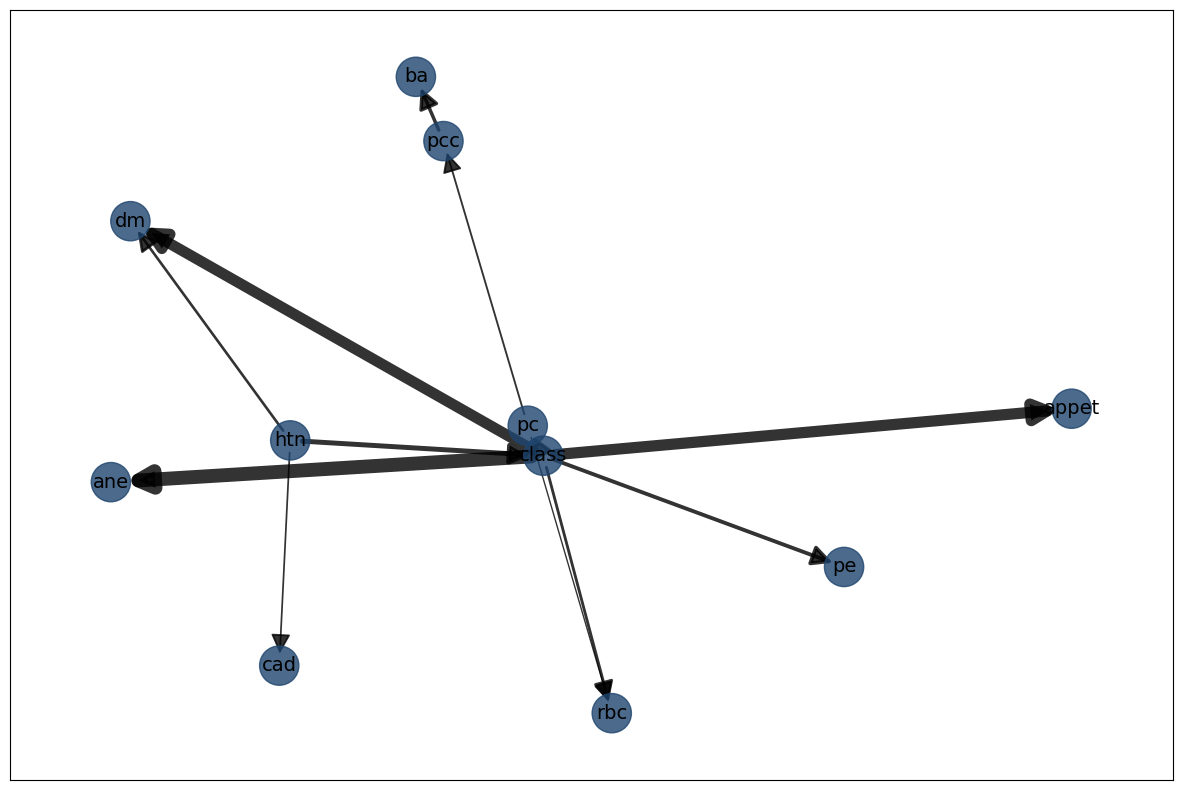

In [37]:

# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
model = bn.independence_test(model, dfnum, alpha=0.05, prune=True)

# Plot the DAG
G = bn.plot(model)
